<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.

На данных Яндекс.Музыки вы сравните поведение пользователей двух столиц.

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `yandex_music_project.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Вы проверите данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки вы поищете возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.



## Обзор данных

Составьте первое представление о данных Яндекс.Музыки.




Основной инструмент аналитика — `pandas`. Импортируйте эту библиотеку.

In [2]:
import pandas as pd

Прочитайте файл `yandex_music_project.csv` из папки `/datasets` и сохраните его в переменной `df`:

In [3]:
df = pd.read_csv('/datasets/music_project.csv')

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Отлично, все верно подгружено. 
    
Также при работе с проектами тебе может понадобится работать на своей машине локально. Но в итоге сдать его можно только с сервера. Чтобы данные подгружались и локально и глобально можно использовать конструкцию try-except

Также в таких случаях стоит применять библиотеку ``os``:

    import os

    pth1 = '/folder_1/data.csv' # Локальный путь
    pth2 = '/folder_2/data.csv' # Серверный путь
    
    if os.path.exists(pth1):
        data = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        data = pd.read_csv(pth2)
    else:
        print('Something is wrong)  
    
Т.е. программа пытается подгрузить файл локально, и если не удается, то подгружает с сервера, если и это не удается, то пишет об ошибке
    
</div>

Выведите на экран первые десять строк таблицы:

In [4]:
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


Одной командой получить общую информацию о таблице:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
  userID    65079 non-null object
Track       63848 non-null object
artist      57876 non-null object
genre       63881 non-null object
  City      65079 non-null object
time        65079 non-null object
Day         65079 non-null object
dtypes: object(7)
memory usage: 3.5+ MB


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Первые строки таблицы и общая информация верно выведены, правильные методы использовал, отличное начало

</div>

Итак, в таблице семь столбцов. Тип данных во всех столбцах — `object`.

Согласно документации к данным:
* `userID` — идентификатор пользователя;
* `Track` — название трека;  
* `artist` — имя исполнителя;
* `genre` — название жанра;
* `City` — город пользователя;
* `time` — время начала прослушивания;
* `Day` — день недели.

В названиях колонок видны три нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Встречаются пробелы.
3. Отсутствует underscore в 'userID'



Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Все ошибки верно отмечены. Да, разделение подчеркиванием принято называть snake_case
</div>

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
Исправьте стиль в заголовках столбцов, исключите пропуски. Затем проверьте данные на дубликаты.

### Стиль заголовков
Выведите на экран названия столбцов:

In [6]:
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Приведите названия в соответствие с хорошим стилем:
* несколько слов в названии запишите в «змеином_регистре»,
* все символы сделайте строчными,
* устраните пробелы.

Для этого переименуйте колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [7]:
cols = ['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day']
df.set_axis(cols, axis='columns', inplace=True)

Проверьте результат. Для этого ещё раз выведите на экран названия столбцов:

In [8]:
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Отлично, название столбцов исправили

</div>

### Пропуски значений
Сначала посчитайте, сколько в таблице пропущенных значений. Для этого достаточно двух методов `pandas`:

In [9]:
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны для вашей работы. Достаточно заменить их явными обозначениями.

Но пропуски в `genre` могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Замените пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. Для этого создайте список `columns_to_replace`, переберите его элементы циклом `for` и для каждого столбца выполните замену пропущенных значений:

In [11]:
df['track'] = df['track'].fillna('unknown')
df['artist'] = df['artist'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

Убедитесь, что в таблице не осталось пропусков. Для этого ещё раз посчитайте пропущенные значения.

In [12]:
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#можно лучше**

Отлично, все пропуски заполнены правильно, только лучше было бы использовтаь цикл


</div>

### Дубликаты
Посчитайте явные дубликаты в таблице одной командой:

In [13]:
df.duplicated().sum()

3826

Вызовите специальный метод `pandas`, чтобы удалить явные дубликаты:

In [16]:
df = df.drop_duplicates().reset_index(drop=True)

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Переиндексация верно выполнена

</div>

Ещё раз посчитайте явные дубликаты в таблице — убедитесь, что полностью от них избавились:

In [17]:
df.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Ок, все верно. Классно разобрались с дубликатами, но стоит подписывать выводимые значения не комментариями в коде, а непосредственно при выводе. Например,
    
"Количество явных дубликатов: 3826"

</div>

Теперь избавьтесь от неявных дубликатов в колонке `genre`. Например, название одного и того же жанра может быть записано немного по-разному. Такие ошибки тоже повлияют на результат исследования.

Выведите на экран список уникальных названий жанров, отсортированный в алфавитном порядке. Для этого:
* извлеките нужный столбец датафрейма, 
* примените к нему метод сортировки,
* для отсортированного столбца вызовите метод, который вернёт уникальные значения из столбца.

In [23]:
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Все верно отсортировано. Правильно, что ты сделал все в одну строку, без дополнительных переменных

</div>

Просмотрите список и найдите неявные дубликаты названия `hiphop`. Это могут быть названия с ошибками или альтернативные названия того же жанра.

Вы увидите следующие неявные дубликаты:
* *hip*,
* *hop*,
* *hip-hop*.

Чтобы очистить от них таблицу, напишите функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [28]:
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genres, correct_genre)
        

Вызовите `replace_wrong_genres()` и передайте ей такие аргументы, чтобы она устранила неявные дубликаты: вместо `hip`, `hop` и `hip-hop` в таблице должно быть значение `hiphop`:

In [31]:
duplicates = ['hip','hop','hip-hop']
name = 'hiphop'
replace_wrong_genres(duplicates, name)

Проверьте, что заменили неправильные названия:

*   hip
*   hop
*   hip-hop

Выведите отсортированный список уникальных значений столбца `genre`:

In [32]:
df['genre'].sort_values().unique()

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Хорошо, ошибки в написании жанров поправили. Если посмотреть на список подробнее, то есть и другие ошибки, но это уже сверх задания

</div>

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Вы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.

Пропущенные значения вы заменили на `'unknown'`. Ещё предстоит увидеть, не повредят ли исследованию пропуски в колонке `genre`.

Теперь можно перейти к проверке гипотез. 

## Проверка гипотез

### Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.


Для тренировки сначала выполните каждый из расчётов по отдельности. 

Оцените активность пользователей в каждом городе. Сгруппируйте данные по городу и посчитайте прослушивания в каждой группе.



In [40]:
df.groupby('city')['genre'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: genre, dtype: int64

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Теперь сгруппируйте данные по дню недели и подсчитайте прослушивания в понедельник, среду и пятницу. Учтите, что в данных есть информация только о прослушиваниях только за эти дни.


In [41]:
df.groupby('day')['genre'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: genre, dtype: int64

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Молодец, правильно использован groupby
</div>

В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

Вы видели, как работает группировка по городу и по дням недели. Теперь напишите функцию, которая объединит два эти расчёта.

Создайте функцию `number_tracks()`, которая посчитает прослушивания для заданного дня и города. Ей понадобятся два параметра:
* день недели,
* название города.

В функции сохраните в переменную строки исходной таблицы, у которых значение:
  * в колонке `day` равно параметру `day`,
  * в колонке `city` равно параметру `city`.

Для этого примените последовательную фильтрацию с логической индексацией.

Затем посчитайте значения в столбце `user_id` получившейся таблицы. Результат сохраните в новую переменную. Верните эту переменную из функции.

In [47]:
def number_tracks(df, day, city):
    track_list = df[ (df['day'] == day) & (df['city'] == city) ]
    track_list_count = track_list['user_id'].count()
    return track_list_count

Вызовите `number_tracks()` шесть раз, меняя значение параметров — так, чтобы получить данные для каждого города в каждый из трёх дней.

In [48]:
number_tracks(df, 'Monday', 'Moscow')

15740

In [49]:
number_tracks(df, 'Monday', 'Saint-Petersburg')

5614

In [50]:
number_tracks(df, 'Wednesday', 'Moscow')

11056

In [51]:
number_tracks(df, 'Wednesday', 'Saint-Petersburg')

7003

In [52]:
number_tracks(df, 'Friday', 'Moscow')

15945

In [53]:
number_tracks(df, 'Friday', 'Saint-Petersburg')

5895

Создайте c помощью конструктора `pd.DataFrame` таблицу, где
* названия колонок — `['city', 'monday', 'wednesday', 'friday']`;
* данные — результаты, которые вы получили с помощью `number_tracks`.

In [59]:
data = [['Moscow', 15347, 10865, 15680],['Saint-Petersburg', 5519, 6913, 5802]]
columns = ['city','monday','wednesday','friday']
table = pd.DataFrame(data = data, columns = columns)
table

,city,monday,wednesday,friday
0,Moscow,15347,10865,15680
1,Saint-Petersburg,5519,6913,5802


<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Отлично, датасет правильно собран.

Можно было использовать функцию для рассчета при сборке датасэта и обойтись без циклов

    pd.DataFrame(data=[['Moscow', number_tracks(day='Monday', city='Moscow'), number_tracks(day='Wednesday', city='Moscow'), number_tracks(day='Friday', city='Moscow')], ...
                                         
</div>

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [57]:
moscow_general = df[df['city'] == 'Moscow']

In [58]:
spb_general = df[df['city'] == 'Saint-Petersburg']


Создайте функцию `genre_weekday()` с четырьмя параметрами:
* таблица (датафрейм) с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна вернуть информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [1]:
def genre_weekday(table,day,time1,time2):
    genre_df = df[(df['day'] == day) & (df['time'] > time1) & (df['time'] < time2)]
    genre_df_sorted = genre_df.sort_values(by = 'genre', ascending = False).head(10)
    return genre_df_sorted

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Не верно написана функция. В итоге должна получиться таблица с двумя колонками, жанр и количество прослушиваний.

Вот такого вида

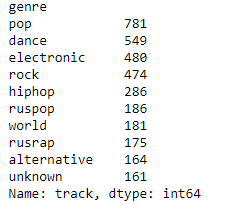
</div>

Cравните результаты функции `genre_weekday()` для Москвы и Санкт-Петербурга в понедельник утром (с 7:00 до 11:00) и в пятницу вечером (с 17:00 до 23:00):

In [79]:
genre_weekday(moscow_general, 'Monday', '07:00:00', '11:00:00')

,user_id,track,artist,genre,city,time,day
27939,D7FB50DA,Drumming Circle,Professor Trance,worldbeat,Moscow,09:30:47,Monday
48545,FFF92382,Мёргул,Ансамбль Чангы-Хая,world,Moscow,09:50:44,Monday
46514,3FB9DEFB,No Tomorrow,Scott Jeffers Traveler,world,Moscow,08:09:39,Monday
18117,EF8C5971,Bossa Per Strada,Marchio Bossa,world,Moscow,08:18:30,Monday
46527,6621A73,Ziplock,16,world,Moscow,08:19:36,Monday
13415,44659C3,Utsukushiki Zankoku Na Sekai (From ''attack on...,Mika Ogawa,world,Moscow,08:58:29,Monday
7144,486D0CEE,Apocalipse,Jose Mauro,world,Saint-Petersburg,08:48:50,Monday
28044,40296EF3,All Along the Watchtower,Crazy Chris Kramer,world,Moscow,08:57:29,Monday
41960,F3361E35,Cari Pokemon,Faiha,world,Moscow,10:00:28,Monday
20121,D5043DEC,Tibetan Chant,Manose/Dorje Lama,world,Moscow,08:40:17,Monday


In [80]:
genre_weekday(spb_general, 'Monday','07:00:00', '11:00:00')

,user_id,track,artist,genre,city,time,day
27939,D7FB50DA,Drumming Circle,Professor Trance,worldbeat,Moscow,09:30:47,Monday
48545,FFF92382,Мёргул,Ансамбль Чангы-Хая,world,Moscow,09:50:44,Monday
46514,3FB9DEFB,No Tomorrow,Scott Jeffers Traveler,world,Moscow,08:09:39,Monday
18117,EF8C5971,Bossa Per Strada,Marchio Bossa,world,Moscow,08:18:30,Monday
46527,6621A73,Ziplock,16,world,Moscow,08:19:36,Monday
13415,44659C3,Utsukushiki Zankoku Na Sekai (From ''attack on...,Mika Ogawa,world,Moscow,08:58:29,Monday
7144,486D0CEE,Apocalipse,Jose Mauro,world,Saint-Petersburg,08:48:50,Monday
28044,40296EF3,All Along the Watchtower,Crazy Chris Kramer,world,Moscow,08:57:29,Monday
41960,F3361E35,Cari Pokemon,Faiha,world,Moscow,10:00:28,Monday
20121,D5043DEC,Tibetan Chant,Manose/Dorje Lama,world,Moscow,08:40:17,Monday


In [81]:
genre_weekday(moscow_general, 'Friday','17:00:00', '23:00:00')

,user_id,track,artist,genre,city,time,day
23515,910A5B70,A ma table,DJ Vielo & DJ Anilson feat. Le D,world,Moscow,20:14:49,Friday
32456,AAA7117,Yo Aprendí,Danay Suárez,world,Moscow,21:54:58,Friday
21852,8A7AC9EC,Yao Jaam Da Brande,Janaan,world,Moscow,20:23:01,Friday
38648,F18CD033,Otar Amayi Champeqi Vra,Дети Picasso,world,Moscow,20:53:25,Friday
28593,280F5815,Lukitau,Te Vaka,world,Moscow,20:34:41,Friday
2937,2487DD6F,Макарий,Абстрактор,world,Moscow,20:57:45,Friday
44495,917047E8,The Nomad,Niraj Chag Featuring Melissa Baten,world,Moscow,21:58:43,Friday
38734,1F05A2D2,Полно солнышко из-за леса светить,Тим Дорофеев,world,Moscow,20:01:35,Friday
38749,A7D7EEA0,Sakurabiyori,Kazuha Oda,world,Moscow,20:25:54,Friday
44475,CD0F9AA0,Taroni Oror,Hasmik Harutyunyan with the Shoghaken Ensemble,world,Moscow,21:57:50,Friday


In [82]:
genre_weekday(spb_general, 'Friday','17:00:00', '23:00:00')

,user_id,track,artist,genre,city,time,day
23515,910A5B70,A ma table,DJ Vielo & DJ Anilson feat. Le D,world,Moscow,20:14:49,Friday
32456,AAA7117,Yo Aprendí,Danay Suárez,world,Moscow,21:54:58,Friday
21852,8A7AC9EC,Yao Jaam Da Brande,Janaan,world,Moscow,20:23:01,Friday
38648,F18CD033,Otar Amayi Champeqi Vra,Дети Picasso,world,Moscow,20:53:25,Friday
28593,280F5815,Lukitau,Te Vaka,world,Moscow,20:34:41,Friday
2937,2487DD6F,Макарий,Абстрактор,world,Moscow,20:57:45,Friday
44495,917047E8,The Nomad,Niraj Chag Featuring Melissa Baten,world,Moscow,21:58:43,Friday
38734,1F05A2D2,Полно солнышко из-за леса светить,Тим Дорофеев,world,Moscow,20:01:35,Friday
38749,A7D7EEA0,Sakurabiyori,Kazuha Oda,world,Moscow,20:25:54,Friday
44475,CD0F9AA0,Taroni Oror,Hasmik Harutyunyan with the Shoghaken Ensemble,world,Moscow,21:57:50,Friday


**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

In [83]:
moscow_genres = moscow_general.groupby('genre')['genre'].count().sort_values(ascending = False)

Выведите на экран первые десять строк `moscow_genres`:

In [84]:
moscow_genres.head(10)

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64

Теперь повторите то же и для Петербурга.

Сгруппируйте таблицу `spb_general` по жанру. Посчитайте прослушивания треков каждого жанра. Результат отсортируйте в порядке убывания и сохраните в таблице `spb_genres`:


In [85]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending = False)

Выведите на экран первые десять строк `spb_genres`:

In [86]:
spb_genres.head(10)

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

В этой части все верно

</div>

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**На практике исследования содержат проверки статистических гипотез.**
Из данных одного сервиса не всегда можно сделать вывод о всех жителях города.
Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных. 
С методами проверок гипотез вы ещё познакомитесь в следующих темах.

<div style="border:solid green 2px; padding: 20px"> 

**Общий комментарий по проекту**

Ты отлично поработал над проектом, молодец. Ты сделал хороший самостоятельный анализ.
    
Ты молодец, отлично справляешься с программой.  Дальше все будет интереснее и сложнее.
    
Поправь, пожалуйста, небольшую неточность, чтобы я могла принять проект

Удачи.
    
</div>